# Fertility Rate Prediction Model 

>By Tom Grigg and Erika Russi (DS-10.22.2018)

Total Fertility Rate (TFR) is defined as the "average number of children that would be born to a woman by the time
she ended childbearing if she were to pass through all her childbearing years conforming to the age-specific fertility
rates of a given year." TFR is the best single measure to compare fertility across populations. 

We built a model that predicts the TFR (births per woman) of a country in a given year. The independent variables in our model consisted of the following predictors by country and year (unless specified otherwise, all data pulled from the World Bank DataBank):
* GDP per capita (current US$)
* Population Density (people per sq. km of land area)
* Life expectancy at birth, total (years)
* Population ages 0-14 (% of total)
* Population ages 15-64 (% of total)
* Population ages 65 and above (% of total)
* Mortality rate, under-5 (per 1,000 live births)
* Mortality rate, infant (per 1,000 live births); and

From the Geert Hofstede model for Cultural Dimensions (kept constant for each country across time):
* Long Term Orientation	Index (measured 0 - 100 for each country)
* Indulgence vs. Restraint Index (measured 0 - 100 for each country)

In [1]:
from masseuse import Masseuse
m = Masseuse()
data = m.build_data()
data.shape

/Users/flatironschool/Desktop/mod_2_project-master 3/masseuse.py:90: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  self.dfs['mf'] = self.dfs['mf'].convert_objects(convert_numeric=True)


(3920, 12)

In [2]:
#create dummy variables
#don't drop a category - just don't use intercept when modelling 
#to avoid multicollinearity (whatever that means)
import pandas as pd

df = pd.get_dummies(data, columns=['continent'],drop_first = True)

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

#columns = "age sex bmi map tc ldl hdl tch ltg glu y".split() # Declare the columns names
#diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
#df = pd.read_csv('diabetes.tab.txt', sep='\t', lineterminator='\n')
#df.columns= columns
#features = df.iloc[:,:-1]
#target = df.y

features = df.iloc[:,1:]
target = df['fertility']

In [4]:
#features['female'] = pd.get_dummies(features['sex'],drop_first=True)
#features.drop(columns=['sex'], inplace=True)

In [5]:
features.head()

density         gdp  life_expectancy  mort_rate_infant  \
Country Code Years                                                              
ALB          1984   106.001058  662.520052           71.134              48.9   
             1985   108.202993  662.914793           71.388              45.7   
             1986   110.315146  719.157296           71.605              42.9   
             1987   112.540328  699.384292           71.760              40.5   
             1988   114.683796  676.566733           71.843              38.3   

                    mort_rate_under_5  pop_percentage_15_to_64  \
Country Code Years                                               
ALB          1984                58.2                60.298140   
             1985                54.0                60.612789   
             1986                50.4                60.876611   
             1987                47.2                61.106398   
             1988                44.5                61.312697   

                    pop_percentage_above_65  pop_percentage_under_14  \
Country Code Years                                                     
ALB          1984                  5.390937                34.310923   
             1985                  5.399862                33.987349   
             1986                  5.413536                33.709853   
             1987                  5.417392                33.476210   
             1988                  5.423440                33.263863   

                    long term orientation  indulgence vs restraint  \
Country Code Years                                                   
ALB          1984                    61.0                     15.0   
             1985                    61.0                     15.0   
             1986                    61.0                     15.0   
             1987                    61.0                     15.0   
             1988                    61.0                     15.0   

                    continent_Americas  continent_Asia  continent_Europe  \
Country Code Years                                                         
ALB          1984                    0               0                 1   
             1985                    0               0                 1   
             1986                    0               0                 1   
             1987                    0               0                 1   
             1988                    0               0                 1   

                    continent_Oceania  
Country Code Years                     
ALB          1984                   0  
             1985                   0  
             1986                   0  
             1987                   0  
             1988                   0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)


If you have multiple predictor variables in a regression, here is advice from Tabachnick & Fidell, Using Multivariate Statistics (k is the number of predictors)

a minimum N > 50 + (8*k) for tests of multiple R

a minimum N > 104 + k for tests of individual predictors

In [7]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train.iloc[:,:-1]

density           gdp  life_expectancy  \
Country Code Years                                               
ARG          1983     10.762906   3530.131783        70.234000   
MKD          2012     82.237748   4698.689476        75.019000   
UGA          2008    158.470027    449.692818        55.574000   
DNK          1970    116.326575   3464.456995        73.343415   
THA          2012    132.795668   5859.887644        74.446000   
TZA          1990     28.741933    172.044798        50.206000   
MKD          2008     81.941260   4793.292959        74.305000   
ARG          1980     10.270030   2738.284723        69.464000   
IND          1972    194.878737    121.692289        49.075000   
COL          2005     39.013640   3386.025600        72.303000   
PRT          2015    113.072026  19252.634954        81.124390   
SGP          2010   7231.811966  46569.679506        81.541463   
NZL          1985     12.331852   7684.055046        73.829268   
ISL          1998      2.733636  30847.643697        79.602439   
THA          1965     62.288939    137.918040        57.136000   
IND          2005    384.811826    707.008019        64.556000   
FIN          2015     18.030111  42424.220808        81.480488   
ALB          2007    108.394781   3603.013685        75.656000   
FIN          1966     15.039460   2010.213456        69.477073   
VNM          1987    196.261934    573.847285        69.626000   
TTO          1994    243.726706   3956.758089        68.296000   
BFA          2011     58.778889    666.840410        57.762000   
RWA          1996    247.878719    226.050189        35.923000   
GRC          2000     83.830939  12042.953731        77.887805   
SLV          2001    285.036776   2079.683818        69.135000   
ZMB          1987      9.935143    307.337021        47.142000   
ZWE          1981     19.211426   1077.965350        59.921000   
DNK          2007    128.716427  58487.045012        78.195122   
IRL          1968     42.321817   1124.516636        70.844293   
ITA          1969    182.033763   1813.388126        70.811951   
...                         ...           ...              ...   
AUT          2009    101.035663  47963.179402        80.331707   
AUS          1980      1.912448  10191.816060        74.333659   
PAK          1978     94.949846    243.460837        56.311000   
UGA          1986     75.844657    258.881962        47.625000   
KOR          1991    448.846195   7523.477002        72.046341   
CHN          1969     84.789498    100.129903        57.603000   
USA          2004     31.958945  41921.809762        77.487805   
IND          2008    402.647293    991.484630        65.802000   
DEU          1981    224.580835  10170.446275        72.950390   
ARG          1971      8.903617   1366.354726        66.740000   
HRV          2004     79.324518   9365.742468        75.520244   
NZL          1999     14.564961  15322.223834        77.890244   
GBR          2006    251.505890  44252.315823        79.248780   
NLD          1999    468.367536  27951.734289        77.836585   
VEN          2005     30.365808   5432.688675        73.134000   
EGY          1997     66.453480   1185.718121        67.690000   
ALB          1993    117.784197    380.527371        71.860000   
GBR          1981    232.851771   9599.306222        74.026829   
EGY          1966     31.842499    168.451804        50.955000   
ZMB          1996     12.637114    382.915111        43.183000   
PAK          1967     69.519159    138.154386        50.954000   
CAN          1979      2.669706  10012.443967        74.866341   
SLV          1999    281.138369   1937.139014        68.541000   
BFA          1976     22.931422    155.648998        42.343000   
TZA          2011     53.703886    733.412807        61.713000   
MAR          2006     69.167255   2191.478567        72.029000   
RUS          2005      8.761071   5323.473877        65.529756   
GHA          1974     42.209176    301.366801        50.505000  

In [10]:
scaler.fit(X_train.iloc[:,:-5])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:-5]), columns=X_train.columns[:-5], index=X_train.index)

#ADD BACK CATEGORICAL VARIABLES
#continent_Africa	continent_Americas	continent_Asia	continent_Europe

# features_scaled_train['continent_Africa']= X_train.continent_Africa
features_scaled_train['continent_Americas']= X_train.continent_Americas
features_scaled_train['continent_Asia']= X_train.continent_Asia
features_scaled_train['continent_Europe']= X_train.continent_Europe
features_scaled_train['continent_Oceania']= X_train.continent_Oceania


features_scaled_train.head()


density       gdp  life_expectancy  mort_rate_infant  \
Country Code Years                                                          
ARG          1983  -0.288228 -0.386477         0.197515         -0.193960   
MKD          2012  -0.171710 -0.309007         0.672136         -0.719355   
UGA          2008  -0.047437 -0.590696        -1.256602          0.457827   
DNK          1970  -0.116139 -0.390831         0.505936         -0.602876   
THA          2012  -0.089291 -0.232024         0.615301         -0.689616   

                    mort_rate_under_5  pop_percentage_15_to_64  \
Country Code Years                                               
ARG          1983           -0.307779                -0.106248   
MKD          2012           -0.667287                 1.404883   
UGA          2008            0.492606                -2.008253   
DNK          1970           -0.575561                 0.441041   
THA          2012           -0.642136                 1.540184   

                    pop_percentage_above_65  pop_percentage_under_14  \
Country Code Years                                                     
ARG          1983                 -0.024773                 0.075722   
MKD          2012                  0.637140                -1.147304   
UGA          2008                 -1.207148                 1.779877   
DNK          1970                  0.711834                -0.601655   
THA          2012                  0.173792                -1.010237   

                    long term orientation  continent_Americas  continent_Asia  \
Country Code Years                                                              
ARG          1983               -0.945554                   1               0   
MKD          2012                0.871127                   0               0   
UGA          2008               -0.772536                   0               0   
DNK          1970               -0.296739                   0               0   
THA          2012               -0.426502                   0               1   

                    continent_Europe  continent_Oceania  
Country Code Years                                       
ARG          1983                  0                  0  
MKD          2012                  1                  0  
UGA          2008                  0                  0  
DNK          1970                  1                  0  
THA          2012                  0                  0

In [11]:
X_test.head()

density           gdp  life_expectancy  \
Country Code Years                                               
DNK          1998    125.011053  33368.154851        76.139024   
PER          1989     16.694421   1052.913452        65.045000   
GHA          1997     77.387765    391.355680        57.171000   
ESP          1978     73.799167   4344.606706        74.295610   
SGP          1990   4547.958209  11864.280213        75.295122   

                    mort_rate_infant  mort_rate_under_5  \
Country Code Years                                        
DNK          1998                4.8                5.8   
PER          1989               59.5               85.0   
GHA          1997               69.1              108.1   
ESP          1978               14.8               17.7   
SGP          1990                6.2                7.7   

                    pop_percentage_15_to_64  pop_percentage_above_65  \
Country Code Years                                                     
DNK          1998                 66.935912                15.020549   
PER          1989                 57.128020                 3.939242   
GHA          1997                 54.610408                 2.998090   
ESP          1978                 62.545757                10.780642   
SGP          1990                 72.941032                 5.598826   

                    pop_percentage_under_14  long term orientation  \
Country Code Years                                                   
DNK          1998                 18.043540                   35.0   
PER          1989                 38.932739                   25.0   
GHA          1997                 42.391503                    4.0   
ESP          1978                 26.673601                   48.0   
SGP          1990                 21.460142                   72.0   

                    indulgence vs restraint  continent_Americas  \
Country Code Years                                                
DNK          1998                      70.0                   0   
PER          1989                      46.0                   1   
GHA          1997                      72.0                   0   
ESP          1978                      44.0                   0   
SGP          1990                      46.0                   0   

                    continent_Asia  continent_Europe  continent_Oceania  
Country Code Years                                                       
DNK          1998                0                 1                  0  
PER          1989                0                 0                  0  
GHA          1997                0                 0                  0  
ESP          1978                0                 1                  0  
SGP          1990                1                 0                  0

In [12]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:-5]), columns=X_test.columns[:-5], index=X_test.index)

# features_scaled_test['continent_Africa']= X_test.continent_Africa
features_scaled_test['continent_Americas']= X_test.continent_Americas
features_scaled_test['continent_Asia']= X_test.continent_Asia
features_scaled_test['continent_Europe']= X_test.continent_Europe
features_scaled_test['continent_Oceania']= X_test.continent_Oceania

features_scaled_test.head()

density       gdp  life_expectancy  mort_rate_infant  \
Country Code Years                                                          
DNK          1998  -0.101982  1.591649         0.783231         -0.828400   
PER          1989  -0.278558 -0.550705        -0.317179          0.527219   
GHA          1997  -0.179616 -0.594563        -1.098197          0.765134   
ESP          1978  -0.185467 -0.332481         0.600384         -0.580572   
SGP          1990   7.108260  0.166039         0.699525         -0.793704   

                    mort_rate_under_5  pop_percentage_15_to_64  \
Country Code Years                                               
DNK          1998           -0.735342                 0.820034   
PER          1989            0.436387                -0.653323   
GHA          1997            0.778141                -1.031523   
ESP          1978           -0.559287                 0.160538   
SGP          1990           -0.707232                 1.722133   

                    pop_percentage_above_65  pop_percentage_under_14  \
Country Code Years                                                     
DNK          1998                  1.234647                -1.076734   
PER          1989                 -0.891768                 0.814487   
GHA          1997                 -1.072367                 1.127629   
ESP          1978                  0.421042                -0.295404   
SGP          1990                 -0.573307                -0.767409   

                    long term orientation  continent_Americas  continent_Asia  \
Country Code Years                                                              
DNK          1998               -0.296739                   0               0   
PER          1989               -0.729282                   1               0   
GHA          1997               -1.637623                   0               0   
ESP          1978                0.265567                   0               0   
SGP          1990                1.303671                   0               1   

                    continent_Europe  continent_Oceania  
Country Code Years                                       
DNK          1998                  1                  0  
PER          1989                  0                  0  
GHA          1997                  0                  0  
ESP          1978                  1                  0  
SGP          1990                  0                  0

In [13]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
features_135_train = pd.DataFrame(poly.fit_transform(features_scaled_train), columns=poly.get_feature_names(features_scaled_train.columns))
features_135_train.head()

density       gdp  life_expectancy  mort_rate_infant  mort_rate_under_5  \
0 -0.288228 -0.386477         0.197515         -0.193960          -0.307779   
1 -0.171710 -0.309007         0.672136         -0.719355          -0.667287   
2 -0.047437 -0.590696        -1.256602          0.457827           0.492606   
3 -0.116139 -0.390831         0.505936         -0.602876          -0.575561   
4 -0.089291 -0.232024         0.615301         -0.689616          -0.642136   

   pop_percentage_15_to_64  pop_percentage_above_65  pop_percentage_under_14  \
0                -0.106248                -0.024773                 0.075722   
1                 1.404883                 0.637140                -1.147304   
2                -2.008253                -1.207148                 1.779877   
3                 0.441041                 0.711834                -0.601655   
4                 1.540184                 0.173792                -1.010237   

   long term orientation  continent_Americas         ...           \
0              -0.945554                 1.0         ...            
1               0.871127                 0.0         ...            
2              -0.772536                 0.0         ...            
3              -0.296739                 0.0         ...            
4              -0.426502                 0.0         ...            

   continent_Americas^2  continent_Americas continent_Asia  \
0                   1.0                                0.0   
1                   0.0                                0.0   
2                   0.0                                0.0   
3                   0.0                                0.0   
4                   0.0                                0.0   

   continent_Americas continent_Europe  continent_Americas continent_Oceania  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   0.0   
4                                  0.0                                   0.0   

   continent_Asia^2  continent_Asia continent_Europe  \
0               0.0                              0.0   
1               0.0                              0.0   
2               0.0                              0.0   
3               0.0                              0.0   
4               1.0                              0.0   

   continent_Asia continent_Oceania  continent_Europe^2  \
0                               0.0                 0.0   
1                               0.0                 1.0   
2                               0.0                 0.0   
3                               0.0                 1.0   
4                               0.0                 0.0   

   continent_Europe continent_Oceania  continent_Oceania^2  
0                                 0.0                  0.0  
1                                 0.0                  0.0  
2                                 0.0                  0.0  
3                                 0.0                  0.0  
4                                 0.0                  0.0  

[5 rows x 104 columns]

In [14]:
pd.set_option('display.max_columns', 100)


In [15]:
features_135_train.head()

density       gdp  life_expectancy  mort_rate_infant  mort_rate_under_5  \
0 -0.288228 -0.386477         0.197515         -0.193960          -0.307779   
1 -0.171710 -0.309007         0.672136         -0.719355          -0.667287   
2 -0.047437 -0.590696        -1.256602          0.457827           0.492606   
3 -0.116139 -0.390831         0.505936         -0.602876          -0.575561   
4 -0.089291 -0.232024         0.615301         -0.689616          -0.642136   

   pop_percentage_15_to_64  pop_percentage_above_65  pop_percentage_under_14  \
0                -0.106248                -0.024773                 0.075722   
1                 1.404883                 0.637140                -1.147304   
2                -2.008253                -1.207148                 1.779877   
3                 0.441041                 0.711834                -0.601655   
4                 1.540184                 0.173792                -1.010237   

   long term orientation  continent_Americas  continent_Asia  \
0              -0.945554                 1.0             0.0   
1               0.871127                 0.0             0.0   
2              -0.772536                 0.0             0.0   
3              -0.296739                 0.0             0.0   
4              -0.426502                 0.0             1.0   

   continent_Europe  continent_Oceania  density^2  density gdp  \
0               0.0                0.0   0.083075     0.111393   
1               1.0                0.0   0.029484     0.053060   
2               0.0                0.0   0.002250     0.028021   
3               1.0                0.0   0.013488     0.045391   
4               0.0                0.0   0.007973     0.020718   

   density life_expectancy  density mort_rate_infant  \
0                -0.056929                  0.055905   
1                -0.115413                  0.123521   
2                 0.059609                 -0.021718   
3                -0.058759                  0.070017   
4                -0.054941                  0.061577   

   density mort_rate_under_5  density pop_percentage_15_to_64  \
0                   0.088710                         0.030624   
1                   0.114580                        -0.241233   
2                  -0.023368                         0.095266   
3                   0.066845                        -0.051222   
4                   0.057337                        -0.137525   

   density pop_percentage_above_65  density pop_percentage_under_14  \
0                         0.007140                        -0.021825   
1                        -0.109403                         0.197004   
2                         0.057264                        -0.084432   
3                        -0.082672                         0.069876   
4                        -0.015518                         0.090205   

   density long term orientation  density continent_Americas  \
0                       0.272535                   -0.288228   
1                      -0.149581                   -0.000000   
2                       0.036647                   -0.000000   
3                       0.034463                   -0.000000   
4                       0.038083                   -0.000000   

   density continent_Asia  density continent_Europe  \
0               -0.000000                 -0.000000   
1               -0.000000                 -0.171710   
2               -0.000000                 -0.000000   
3               -0.000000                 -0.116139   
4               -0.089291                 -0.000000   

   density continent_Oceania     gdp^2  gdp life_expectancy  \
0                       -0.0  0.149364            -0.076335   
1                       -0.0  0.095485            -0.207695   
2                       -0.0  0.348922             0.742270   
3                       -0.0  0.152749            -0.197735   
4                       -0.0  0.053835            -0.142765   

   gdp mort_rate

In [16]:
features_135_test = pd.DataFrame(poly.fit_transform(features_scaled_test), columns=poly.get_feature_names(features_scaled_test.columns))
features_135_test.head()

density       gdp  life_expectancy  mort_rate_infant  mort_rate_under_5  \
0 -0.101982  1.591649         0.783231         -0.828400          -0.735342   
1 -0.278558 -0.550705        -0.317179          0.527219           0.436387   
2 -0.179616 -0.594563        -1.098197          0.765134           0.778141   
3 -0.185467 -0.332481         0.600384         -0.580572          -0.559287   
4  7.108260  0.166039         0.699525         -0.793704          -0.707232   

   pop_percentage_15_to_64  pop_percentage_above_65  pop_percentage_under_14  \
0                 0.820034                 1.234647                -1.076734   
1                -0.653323                -0.891768                 0.814487   
2                -1.031523                -1.072367                 1.127629   
3                 0.160538                 0.421042                -0.295404   
4                 1.722133                -0.573307                -0.767409   

   long term orientation  continent_Americas  continent_Asia  \
0              -0.296739                 0.0             0.0   
1              -0.729282                 1.0             0.0   
2              -1.637623                 0.0             0.0   
3               0.265567                 0.0             0.0   
4               1.303671                 0.0             1.0   

   continent_Europe  continent_Oceania  density^2  density gdp  \
0               1.0                0.0   0.010400    -0.162319   
1               0.0                0.0   0.077595     0.153403   
2               0.0                0.0   0.032262     0.106793   
3               1.0                0.0   0.034398     0.061664   
4               0.0                0.0  50.527357     1.180252   

   density life_expectancy  density mort_rate_infant  \
0                -0.079875                  0.084481   
1                 0.088353                 -0.146861   
2                 0.197254                 -0.137431   
3                -0.111351                  0.107677   
4                 4.972402                 -5.641853   

   density mort_rate_under_5  density pop_percentage_15_to_64  \
0                   0.074991                        -0.083628   
1                  -0.121559                         0.181988   
2                  -0.139767                         0.185278   
3                   0.103729                        -0.029775   
4                  -5.027191                        12.241371   

   density pop_percentage_above_65  density pop_percentage_under_14  \
0                        -0.125911                         0.109807   
1                         0.248409                        -0.226882   
2                         0.192615                        -0.202541   
3                        -0.078089                         0.054788   
4                        -4.075213                        -5.454941   

   density long term orientation  density continent_Americas  \
0                       0.030262                   -0.000000   
1                       0.203147                   -0.278558   
2                       0.294144                   -0.000000   
3                      -0.049254                   -0.000000   
4                       9.266829                    0.000000   

   density continent_Asia  density continent_Europe  \
0                -0.00000                 -0.101982   
1                -0.00000                 -0.000000   
2                -0.00000                 -0.000000   
3                -0.00000                 -0.185467   
4                 7.10826                  0.000000   

   density continent_Oceania     gdp^2  gdp life_expectancy  \
0                       -0.0  2.533346             1.246628   
1                       -0.0  0.303276             0.174672   
2                       -0.0  0.353506             0.652947   
3                       -0.0  0.110543            -0.199616   
4                        0.0  0.027569             0.116149   

   gdp mort_rate

# Filter Methods
Filter feature selection methods apply a statistical measure to assign a scoring to each feature. The features are ranked by the score and either selected to be kept or removed from the dataset. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

![alt text](Filter_1.png)

**Examples:** 
* F-Test
* Chi squared test 
* Information gain 
* Correlation coefficient scores

![alt text](FS1.webp)

In [17]:
from sklearn.feature_selection import VarianceThreshold


In [18]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [19]:
features_selected_train = variance_threshold_selector(features_135_train)

In [20]:
features_selected_train.head()

density       gdp  life_expectancy  mort_rate_infant  mort_rate_under_5  \
0 -0.288228 -0.386477         0.197515         -0.193960          -0.307779   
1 -0.171710 -0.309007         0.672136         -0.719355          -0.667287   
2 -0.047437 -0.590696        -1.256602          0.457827           0.492606   
3 -0.116139 -0.390831         0.505936         -0.602876          -0.575561   
4 -0.089291 -0.232024         0.615301         -0.689616          -0.642136   

   pop_percentage_15_to_64  pop_percentage_above_65  pop_percentage_under_14  \
0                -0.106248                -0.024773                 0.075722   
1                 1.404883                 0.637140                -1.147304   
2                -2.008253                -1.207148                 1.779877   
3                 0.441041                 0.711834                -0.601655   
4                 1.540184                 0.173792                -1.010237   

   long term orientation  density^2  density gdp  density life_expectancy  \
0              -0.945554   0.083075     0.111393                -0.056929   
1               0.871127   0.029484     0.053060                -0.115413   
2              -0.772536   0.002250     0.028021                 0.059609   
3              -0.296739   0.013488     0.045391                -0.058759   
4              -0.426502   0.007973     0.020718                -0.054941   

   density mort_rate_infant  density mort_rate_under_5  \
0                  0.055905                   0.088710   
1                  0.123521                   0.114580   
2                 -0.021718                  -0.023368   
3                  0.070017                   0.066845   
4                  0.061577                   0.057337   

   density pop_percentage_15_to_64  density pop_percentage_under_14  \
0                         0.030624                        -0.021825   
1                        -0.241233                         0.197004   
2                         0.095266                        -0.084432   
3                        -0.051222                         0.069876   
4                        -0.137525                         0.090205   

   density long term orientation  density continent_Asia     gdp^2  \
0                       0.272535               -0.000000  0.149364   
1                      -0.149581               -0.000000  0.095485   
2                       0.036647               -0.000000  0.348922   
3                       0.034463               -0.000000  0.152749   
4                       0.038083               -0.089291  0.053835   

   gdp life_expectancy  gdp mort_rate_infant  gdp mort_rate_under_5  \
0            -0.076335              0.074961               0.118949   
1            -0.207695              0.222286               0.206196   
2             0.742270             -0.270437              -0.290981   
3            -0.197735              0.235623               0.224947   
4            -0.142765              0.160008               0.148991   

   gdp pop_percentage_15_to_64  gdp pop_percentage_above_65  \
0                     0.041062                     0.009574   
1                    -0.434118                    -0.196881   
2                     1.186267                     0.713057   
3                    -0.172372                    -0.278206   
4                    -0.357360                    -0.040324   

   gdp pop_percentage_under_14  gdp long term orientation  \
0                    -0.029265                   0.365434   
1                     0.354524                  -0.269184   
2                    -1.051366                   0.456334   
3                     0.235145                   0.115975   
4                     0.234400                   0.098959   

   gdp continent_Europe  life_expectancy^2  life_expectancy mort_rate_infant  \
0             -0.000000           0.039012                         -0.038310   
1             -0.309007           0.451767             

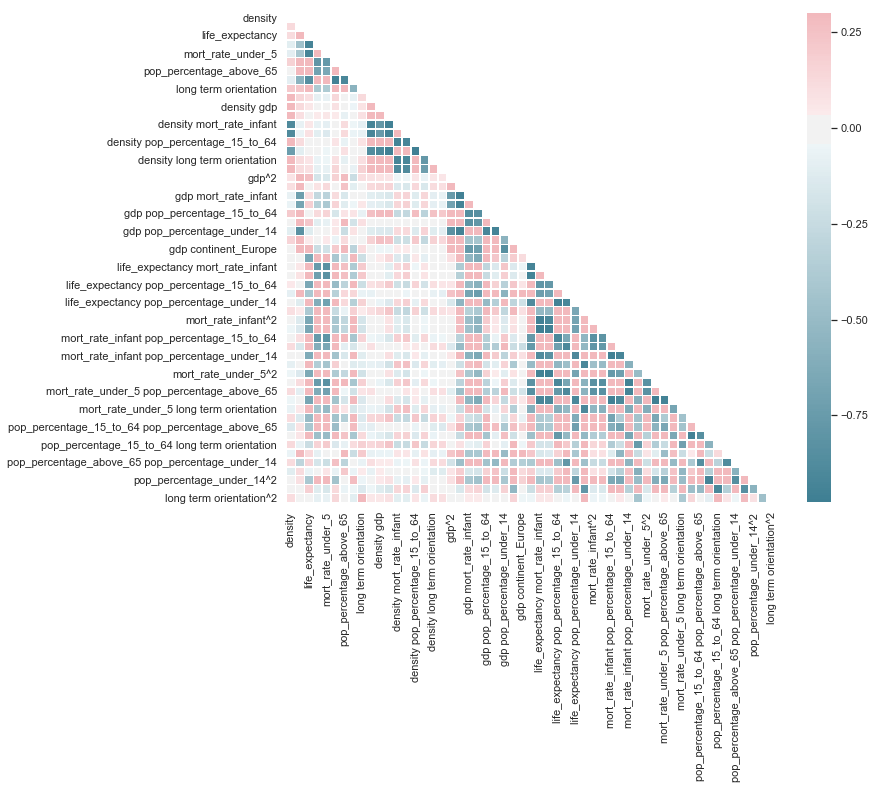

In [21]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [22]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [23]:
def calculate_cols_to_drop(upper):
    #to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    shape = upper.shape
    print(shape)
    row_index = upper.index
    col_index = upper.columns
    to_drop = []
    
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            #print(upper.iloc[row,col])
            if upper.iloc[row, col] > 0.95:
                if row_index[row] in to_drop or col_index[col] in to_drop:
                    pass
                else:
                    to_drop.append(col_index[col])
    
    temp = upper.drop(index= to_drop, columns=to_drop)
    
    print(len(to_drop))
    
    shape = temp.shape
    for row in range(0, shape[0]):
        for col in range(0, shape[1]):
            if temp.iloc[row, col] > 0.95:
                print("IT DIDN'T FUCKING WORK")
                print('row: ' + temp.index[row])
                print('col: ' + temp.columns[col])
            
    return to_drop

corr_removed = calculate_cols_to_drop(upper)

print(len([column for column in upper.columns if any(upper[column] > 0.95)]))
corr_removed

(55, 55)
18
21


['density long term orientation',
 'density continent_Asia',
 'mort_rate_under_5',
 'density life_expectancy',
 'density mort_rate_under_5',
 'density pop_percentage_under_14',
 'gdp mort_rate_infant',
 'life_expectancy mort_rate_under_5',
 'mort_rate_infant^2',
 'mort_rate_infant mort_rate_under_5',
 'mort_rate_under_5^2',
 'life_expectancy pop_percentage_under_14',
 'mort_rate_infant pop_percentage_under_14',
 'mort_rate_under_5 pop_percentage_15_to_64',
 'mort_rate_under_5 pop_percentage_under_14',
 'mort_rate_under_5 pop_percentage_above_65',
 'mort_rate_under_5 long term orientation',
 'pop_percentage_15_to_64 pop_percentage_under_14']

In [24]:
upper

density      gdp  \
density                                              NaN  0.12612   
gdp                                                  NaN      NaN   
life_expectancy                                      NaN      NaN   
mort_rate_infant                                     NaN      NaN   
mort_rate_under_5                                    NaN      NaN   
pop_percentage_15_to_64                              NaN      NaN   
pop_percentage_above_65                              NaN      NaN   
pop_percentage_under_14                              NaN      NaN   
long term orientation                                NaN      NaN   
density^2                                            NaN      NaN   
density gdp                                          NaN      NaN   
density life_expectancy                              NaN      NaN   
density mort_rate_infant                             NaN      NaN   
density mort_rate_under_5                            NaN      NaN   
density pop_percentage_15_to_64                      NaN      NaN   
density pop_percentage_under_14                      NaN      NaN   
density long term orientation                        NaN      NaN   
density continent_Asia                               NaN      NaN   
gdp^2                                                NaN      NaN   
gdp life_expectancy                                  NaN      NaN   
gdp mort_rate_infant                                 NaN      NaN   
gdp mort_rate_under_5                                NaN      NaN   
gdp pop_percentage_15_to_64                          NaN      NaN   
gdp pop_percentage_above_65                          NaN      NaN   
gdp pop_percentage_under_14                          NaN      NaN   
gdp long term orientation                            NaN      NaN   
gdp continent_Europe                                 NaN      NaN   
life_expectancy^2                                    NaN      NaN   
life_expectancy mort_rate_infant                     NaN      NaN   
life_expectancy mort_rate_under_5                    NaN      NaN   
life_expectancy pop_percentage_15_to_64              NaN      NaN   
life_expectancy pop_percentage_above_65              NaN      NaN   
life_expectancy pop_percentage_under_14              NaN      NaN   
life_expectancy long term orientation                NaN      NaN   
mort_rate_infant^2                                   NaN      NaN   
mort_rate_infant mort_rate_under_5                   NaN      NaN   
mort_rate_infant pop_percentage_15_to_64             NaN      NaN   
mort_rate_infant pop_percentage_above_65             NaN      NaN   
mort_rate_infant pop_percentage_under_14             NaN      NaN   
mort_rate_infant long term orientation               NaN      NaN   
mort_rate_under_5^2                                  NaN      NaN   
mort_rate_under_5 pop_percentage_15_to_64            NaN      NaN   
mort_rate_under_5 pop_percentage_above_65            NaN      NaN   
mort_rate_under_5 pop_percentage_under_14            NaN      NaN   
mort_rate_under_5 long term orientation              NaN      NaN   
pop_percentage_15_to_64^2                            NaN      NaN   
pop_percentage_15_to_64 pop_percentage_above_65      NaN      NaN   
pop_percentage_15_to_64 pop_percentage_under_14      NaN      NaN   
pop_percentage_15_to_64 long term orientation        NaN      NaN   
pop_percentage_above_65^2                            NaN      NaN   
pop_percentage_above_65 pop_percentage_under_14      NaN      NaN   
pop_percentage_above_65 long term orientation        NaN      NaN   
pop_percentage_under_14^2                            NaN      NaN   
pop_percentage_under_14 long term orientation        NaN      NaN   
long term orientation^2                              NaN      NaN   

                                                 life_expectancy  \
density                                                 0.118671   
gdp                                             

In [25]:
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [26]:
features_selected_train.drop(columns=to_drop, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression



In [28]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [29]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

In [30]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

density       gdp  life_expectancy  mort_rate_infant  \
0 -0.288228 -0.386477         0.197515         -0.193960   
1 -0.171710 -0.309007         0.672136         -0.719355   
2 -0.047437 -0.590696        -1.256602          0.457827   
3 -0.116139 -0.390831         0.505936         -0.602876   
4 -0.089291 -0.232024         0.615301         -0.689616   

   pop_percentage_15_to_64  pop_percentage_above_65  pop_percentage_under_14  \
0                -0.106248                -0.024773                 0.075722   
1                 1.404883                 0.637140                -1.147304   
2                -2.008253                -1.207148                 1.779877   
3                 0.441041                 0.711834                -0.601655   
4                 1.540184                 0.173792                -1.010237   

   long term orientation     gdp^2  gdp life_expectancy  \
0              -0.945554  0.149364            -0.076335   
1               0.871127  0.095485            -0.207695   
2              -0.772536  0.348922             0.742270   
3              -0.296739  0.152749            -0.197735   
4              -0.426502  0.053835            -0.142765   

   gdp pop_percentage_15_to_64  gdp pop_percentage_above_65  \
0                     0.041062                     0.009574   
1                    -0.434118                    -0.196881   
2                     1.186267                     0.713057   
3                    -0.172372                    -0.278206   
4                    -0.357360                    -0.040324   

   gdp pop_percentage_under_14  gdp long term orientation  \
0                    -0.029265                   0.365434   
1                     0.354524                  -0.269184   
2                    -1.051366                   0.456334   
3                     0.235145                   0.115975   
4                     0.234400                   0.098959   

   life_expectancy mort_rate_infant  life_expectancy pop_percentage_15_to_64  \
0                         -0.038310                                -0.020986   
1                         -0.483505                                 0.944272   
2                         -0.575307                                 2.523575   
3                         -0.305017                                 0.223138   
4                         -0.424321                                 0.947676   

   life_expectancy pop_percentage_above_65  \
0                                -0.004893   
1                                 0.428245   
2                                 1.516905   
3                                 0.360142   
4                                 0.106934   

   life_expectancy long term orientation  \
0                              -0.186761   
1                               0.585516   
2                               0.970771   
3                              -0.150131   
4                              -0.262427   

   mort_rate_infant pop_percentage_15_to_64  \
0                                  0.020608   
1                                 -1.010610   
2                                 -0.919433   
3                                 -0.265893   
4                                 -1.062136   

   mort_rate_infant pop_percentage_above_65  \
0                                  0.004805   
1                                 -0.458330   
2                                 -0.552665   
3                                 -0.429148   
4                                 -0.119850   

   mort_rate_infant long term orientation  pop_percentage_15_to_64^2  \
0                                0.183400                   0.011289   
1                               -0.626650                   1.973695   
2                               -0.353688                   4.033080   
3                                0.178897                   0.194517   
4                                0.294123                   2.372166   

   pop_percentage_15_to_64 pop_percenta

In [31]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=30)

In [32]:
# fit a model
lm = linear_model.LinearRegression(fit_intercept=True)
model = lm.fit(features_selected_train, y_train)


In [33]:
features_selected_test = features_135_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(model.score(features_selected_test, y_test))

0.26332753698229044
0.12668782068722728
0.3559323259936182
0.9669582250831755


Text(0,0.5,'Predictions')

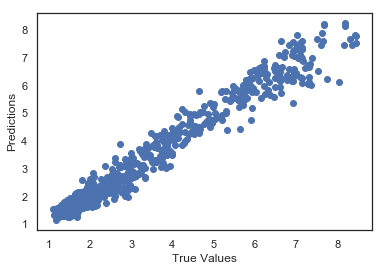

In [34]:
from matplotlib import pyplot as plt

plt.scatter(y_test, y_pred)


plt.xlabel('True Values')
plt.ylabel('Predictions')

# Wrapper Methods

Wrapper methods consider the selection of a set of features as a search problem, where different combinations are prepared, evaluated and compared to other combinations. A predictive model us used to evaluate a combination of features and assign a score based on model accuracy.

The search process may be methodical such as a best-first search, it may stochastic such as a random hill-climbing algorithm, or it may use heuristics, like forward and backward passes to add and remove features.

An example if a wrapper method is the recursive feature elimination algorithm.



![alt text](Wrapper_1.webp)

In [35]:
from sklearn.feature_selection import RFE

In [36]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [37]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [38]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [39]:
rankings[:15]

[(3249132841335.02, 'pop_percentage_above_65 pop_percentage_under_14'),
 (2780152398689.95, 'pop_percentage_under_14 long term orientation'),
 (2280215755136.41, 'pop_percentage_under_14^2'),
 (1675547201537.52, 'pop_percentage_15_to_64 long term orientation'),
 (1344993675360.52, 'pop_percentage_under_14'),
 (1311692922019.19, 'pop_percentage_above_65 long term orientation'),
 (1025382420303.76, 'pop_percentage_above_65^2'),
 (828232120606.43, 'pop_percentage_15_to_64^2'),
 (810603184880.97, 'pop_percentage_15_to_64'),
 (661439239014.6, 'pop_percentage_15_to_64 pop_percentage_above_65'),
 (634576250194.63, 'pop_percentage_above_65'),
 (455428445892.52, 'gdp pop_percentage_under_14'),
 (274478427289.11, 'gdp pop_percentage_15_to_64'),
 (214873928941.94, 'gdp pop_percentage_above_65'),
 (0.48, 'mort_rate_infant')]

In [40]:
[item[1] for item in rankings[0:15]]


['pop_percentage_above_65 pop_percentage_under_14',
 'pop_percentage_under_14 long term orientation',
 'pop_percentage_under_14^2',
 'pop_percentage_15_to_64 long term orientation',
 'pop_percentage_under_14',
 'pop_percentage_above_65 long term orientation',
 'pop_percentage_above_65^2',
 'pop_percentage_15_to_64^2',
 'pop_percentage_15_to_64',
 'pop_percentage_15_to_64 pop_percentage_above_65',
 'pop_percentage_above_65',
 'gdp pop_percentage_under_14',
 'gdp pop_percentage_15_to_64',
 'gdp pop_percentage_above_65',
 'mort_rate_infant']

In [41]:
final_columns = [item[1] for item in rankings[0:15]]


In [44]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

In [43]:
features_selected_test = features_135_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.28858451395904655
0.1572558608321355
0.39655499093081087


# Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods.

Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

Examples of regularization algorithms are the LASSO, Elastic Net and Ridge Regression.

![alt text](Embedded_1.webp)